In [1]:
!pip install git+https://github.com/albermax/innvestigate

  Cloning https://github.com/albermax/innvestigate to /tmp/pip-req-build-5ryxttf4
  Running setup.py bdist_wheel for innvestigate ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-dxjun0py/wheels/f9/54/80/d9a6e23156696217cb721897eefce270d3ad014dbb4f16c835
Successfully built innvestigate


In [0]:
import warnings
warnings.simplefilter('ignore')

https://github.com/albermax/innvestigate

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import keras

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.applications import Xception
from keras import models, layers
import keras.backend

import innvestigate
import innvestigate.utils as iutils

In [0]:
X_test=np.load("/content/drive/My Drive/PSI5886/imagens_teste.npy")
y_test=np.load("/content/drive/My Drive/PSI5886/labels_teste.npy")
X_train=np.load("/content/drive/My Drive/PSI5886/imagens_treino.npy")
y_train=np.load("/content/drive/My Drive/PSI5886/labels_treino.npy")

In [0]:
from keras.applications.resnet50 import ResNet50

xc = ResNet50(weights='imagenet',
              include_top=False,
              input_shape=(64, 64, 3))

In [9]:
xc.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
from keras import Model
lname = "activation_49"
last_vgg_layer = xc.get_layer(lname)

x = Flatten()(last_vgg_layer.get_output_at(0))
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(18, activation='softmax')(x)

model = Model(inputs=xc.inputs, outputs=x)
len(model.layers)

179

In [0]:
model_vgg = models.Sequential()

model_vgg.add(xc)

model_vgg.add(layers.Flatten())

model_vgg.add(layers.Dense(1024, activation='relu'))

model_vgg.add(layers.Dropout(0.5))

model_vgg.add(layers.Dense(18, activation='softmax'))

In [0]:
model_vgg.load_weights("/content/drive/My Drive/PSI5886/modelo_resnet50simpson.h5")

In [17]:
weights=model_vgg.get_weights()
len(model_vgg.layers)

5

In [0]:
last_weights=model_vgg.layers[4].get_weights()
ante_weights=model_vgg.layers[2].get_weights()

In [0]:
model.layers[178].set_weights(last_weights) 
model.layers[176].set_weights(ante_weights) 

In [20]:
len(model.layers)

179

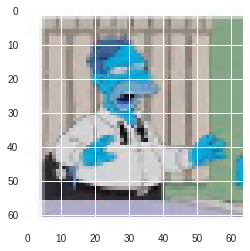

In [21]:
imgplot = plt.imshow(X_test[6])

In [0]:
images=[(X_test[120],y_test[120]),(X_test[534],y_test[534]),(X_test[448],y_test[448]),(X_test[430],y_test[430]),(X_test[327],y_test[327]),
       (X_test[786],y_test[786]),(X_test[221],y_test[221]),(X_test[835],y_test[835]),(X_test[728],y_test[728]),(X_test[561],y_test[561]),(X_test[6],y_test[6])]


In [0]:
def plot_image_grid(grid,
                    row_labels_left,
                    row_labels_right,
                    col_labels,
                    file_name=None,
                    figsize=None,
                    dpi=600):
    n_rows = len(grid)
    n_cols = len(grid[0])
    if figsize is None:
        figsize = (n_cols, n_rows+1)

    plt.clf()
    plt.rc("font", family="sans-serif")

    plt.figure(figsize=figsize)
    for r in range(n_rows):
        for c in range(n_cols):
            ax = plt.subplot2grid(shape=[n_rows+1, n_cols], loc=[r+1, c])
            # TODO controlled color mapping wrt all grid entries,
            # or individually. make input param
            if grid[r][c] is not None:
                ax.imshow(grid[r][c], interpolation='none')
            else:
                for spine in plt.gca().spines.values():
                    spine.set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])

            # column labels
            if not r:
                if col_labels != []:
                    ax.set_title(col_labels[c],
                                 rotation=22.5,
                                 horizontalalignment='left',
                                 verticalalignment='bottom')

            # row labels
            if not c:
                if row_labels_left != []:
                    txt_left = [l+'\n' for l in row_labels_left[r]]
                    ax.set_ylabel(
                        ''.join(txt_left),
                        rotation=0,
                        verticalalignment='center',
                        horizontalalignment='right',
                    )

            if c == n_cols-1:
                if row_labels_right != []:
                    txt_right = [l+'\n' for l in row_labels_right[r]]
                    ax2 = ax.twinx()
                    ax2.set_xticks([])
                    ax2.set_yticks([])
                    ax2.set_ylabel(
                        ''.join(txt_right),
                        rotation=0,
                        verticalalignment='center',
                        horizontalalignment='left'
                    )

    if file_name is None:
        plt.show()
    else:
        print('Saving figure to {}'.format(file_name))
        plt.savefig(file_name, orientation='landscape', dpi=dpi)

In [0]:
# Methods we use and some properties.
methods = [
    # NAME                    OPT.PARAMS                POSTPROC FXN                TITLE
    # Show input.
    ("input",                 {},                         "Input"),

    # Function
    ("gradient",              {"postprocess": "abs"},          "Gradient"),
    


    # Signal
    ("deconvnet",             {},                        "Deconvnet"),
    ("lrp.sequential_preset_a_flat",{"epsilon": 1},          "LRP-PresetAFlat"),

]

In [0]:

# Stripping the softmax activation from the model
model_wo_sm = iutils.keras.graph.model_wo_softmax(model)
# Create analyzers.
analyzers = []
for method in methods:
    try:
        analyzer = innvestigate.create_analyzer(method[0],        # analysis method identifier
                                                model_wo_sm, # model without softmax output
                                                **method[1])      # optional analysis parameters
    except innvestigate.NotAnalyzeableModelException:
        # Not all methods work with all models.
        analyzer = None
    analyzers.append(analyzer)

In [0]:
analysis = np.zeros([len(images), len(analyzers)]+[64,64]+[3])
text = []
map_characters = {0: 'abraham', 1: 'apu', 2: 'bart', 
        3: 'burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna', 
        7: 'homer', 8: 'kent', 9: 'krusty', 10: 'lisa', 
        11: 'marge', 12: 'milhouse', 13: 'moe', 
        14: 'ned', 15: 'nelson', 16: 'skinner', 17: 'sideshow_bob'}
for i, (x, y) in enumerate(images):
    # Add batch axis.
    x_pp = x[None, :, :, :]
    #x_pp = imgnetutils.preprocess(x, net)

    # Predict final activations, probabilites, and label.
    presm = model_wo_sm.predict_on_batch(x_pp)[0]
    prob = model.predict_on_batch(x_pp)[0]
    y_hat = prob.argmax()
    y=y.argmax()
    # Save prediction info:
    text.append(("%s" % map_characters[y],    # ground truth label
                 "%.2f" % presm.max(),             # pre-softmax logits
                 "%.2f" % prob.max(),              # probabilistic softmax output  
                 "%s" % map_characters[y_hat] # predicted label
                ))
    
    for aidx, analyzer in enumerate(analyzers):
        if methods[aidx][0] == "input":
            # Do not analyze, but keep not preprocessed input.
            a = [x]
        elif analyzer:
            # Analyze.
            a = analyzer.analyze(x_pp)

            # Apply common postprocessing, e.g., re-ordering the channels for plotting.
            #a = imgnetutils.postprocess(a, color_conversion, channels_first)
            # Apply analysis postprocessing, e.g., creating a heatmap.
            #a = methods[aidx][2](a)
        else:
            a = np.zeros_like(image)
        # Store the analysis.
        analysis[i, aidx] = (a[0]-a[0].min())/(a[0].max()-a[0].min())

In [27]:
analysis.shape

(11, 4, 64, 64, 3)

Saving figure to /content/drive/My Drive/Colab Notebooks/fig_dense121


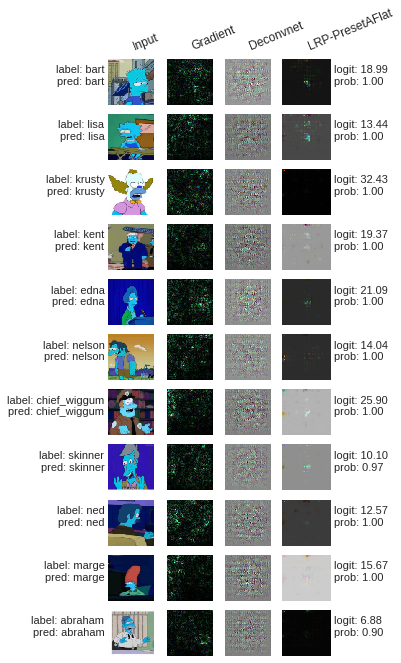

In [28]:
# Prepare the grid as rectengular list
grid = [[analysis[i, j] for j in range(analysis.shape[1])]
        for i in range(analysis.shape[0])]  
# Prepare the labels
label, presm, prob, pred = zip(*text)
row_labels_left = [('label: {}'.format(label[i]),'pred: {}'.format(pred[i])) for i in range(len(label))]
row_labels_right = [('logit: {}'.format(presm[i]),'prob: {}'.format(prob[i])) for i in range(len(label))]
col_labels = [''.join(method[2]) for method in methods]

# Plot the analysis.
plot_image_grid(grid, row_labels_left, row_labels_right, col_labels,
                       file_name='/content/drive/My Drive/PSI5886/fig_resnet50')